<a href="https://colab.research.google.com/github/1Aditya7/BFloat16/blob/main/bf16_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,42271.000000,4.227100e+04,4.227100e+04,4.227100e+04,4.227000e+04,4.227000e+04,42270.000000,42270.0
mean,7.171087,1.490108e+05,7.727734e+05,7.874065e+05,8.450982e+05,1.158405e+06,0.002224,0.0
std,2.118037,3.145005e+05,2.284003e+06,2.321941e+06,2.466743e+06,2.960508e+06,0.047105,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,7.031875e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.751283e+04,1.856733e+04,3.339900e+02,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.794321e+05,1.421965e+05,1.500335e+05,4.337969e+05,8.013660e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.958454e+07,3.130692e+07,1.000000,0.0


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [22]:
df = df.dropna()

print(df.isnull().sum())

Transaction_Hours     0
Type                  0
Transaction_Amt       0
Sender                0
Sender_Bal_B4         0
Sender_Bal_After      0
Reciever              0
Reciever_Bal_B4       0
Reciever_Bal_After    0
isFraud               0
isFlaggedFraud        0
dtype: int64


In [23]:
# Renaming columns to improve readability
df.columns = ['Transaction_Hours', 'Type', 'Transaction_Amt', 'Sender', 'Sender_Bal_B4', 'Sender_Bal_After', 'Reciever', 'Reciever_Bal_B4', 'Reciever_Bal_After', 'isFraud', 'isFlaggedFraud']

In [24]:
#Features with numerical values
features = ['Transaction_Amt', 'Sender_Bal_B4', 'Transaction_Hours', 'Sender_Bal_After', 'Reciever_Bal_B4', 'Reciever_Bal_After']

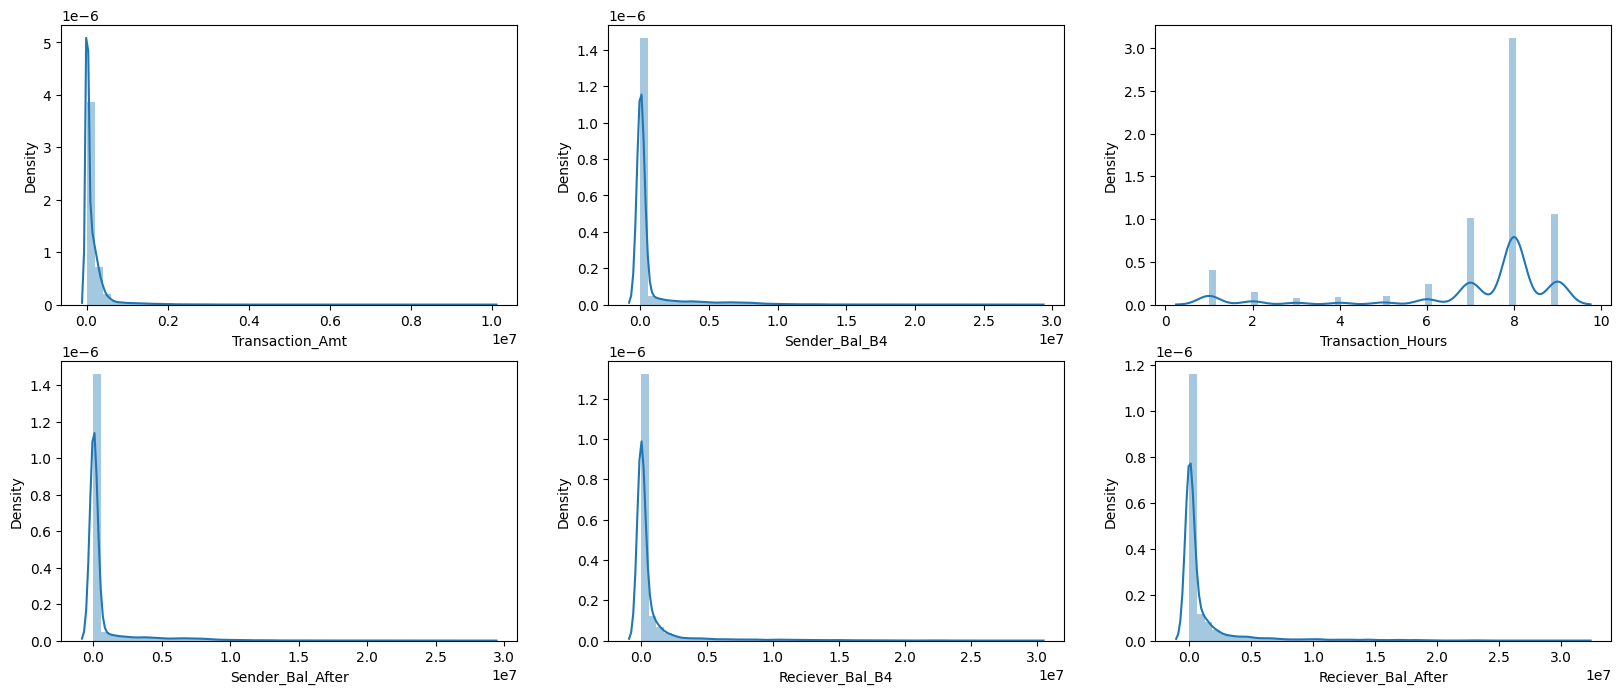

In [25]:
#Plotting all numerical figures for distribution check
plt.figure(figsize =(20,8))
warnings.filterwarnings('ignore')

for feature in features:
  plt.subplot(2, 3, features.index(feature)+1)
  sns.distplot(df[feature])
plt.show()

In [31]:
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()

numeric_df.corr()

,Transaction_Hours,Transaction_Amt,Sender_Bal_B4,Sender_Bal_After,Reciever_Bal_B4,Reciever_Bal_After,isFraud,isFlaggedFraud
Transaction_Hours,1.000000,0.079200,-0.037863,-0.038261,-0.001980,0.014045,-0.050289,NaN
Transaction_Amt,0.079200,1.000000,0.015875,0.004889,0.289998,0.404039,0.058899,NaN
Sender_Bal_B4,-0.037863,0.015875,1.000000,0.998351,0.127877,0.094345,-0.004536,NaN
Sender_Bal_After,-0.038261,0.004889,0.998351,1.000000,0.130743,0.094209,-0.015376,NaN
Reciever_Bal_B4,-0.001980,0.289998,0.127877,0.130743,1.000000,0.929393,-0.012463,NaN
Reciever_Bal_After,0.014045,0.404039,0.094345,0.094209,0.929393,1.000000,-0.008193,NaN
isFraud,-0.050289,0.058899,-0.004536,-0.015376,-0.012463,-0.008193,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


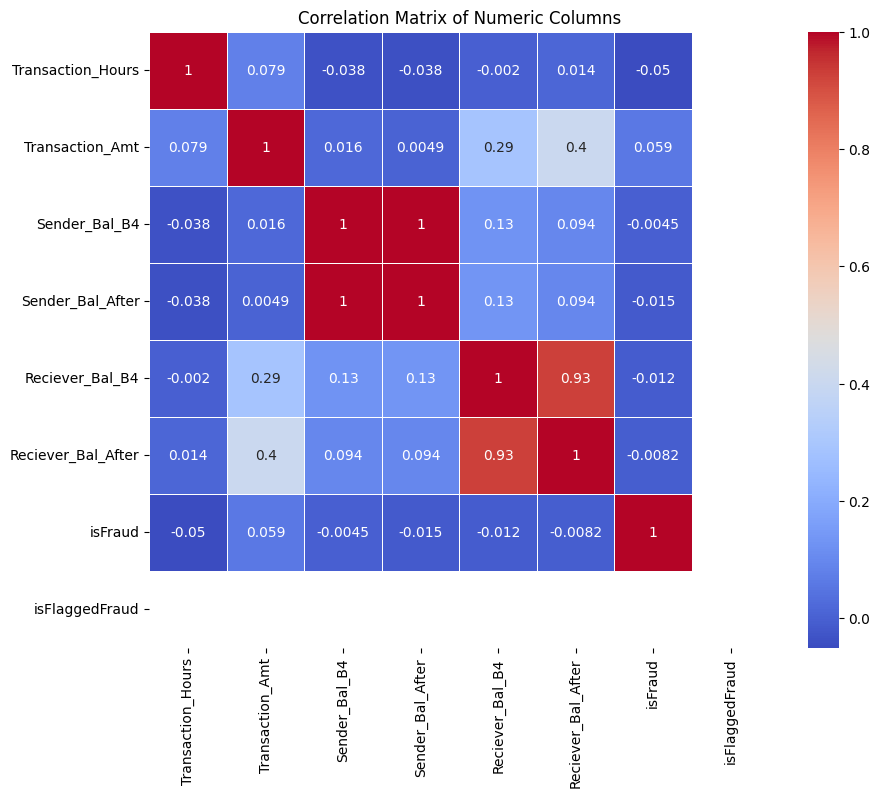

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [36]:
#Count on fraud and not fraud
df['isFraud'].value_counts(normalize = True)

isFraud
0.0    0.997776
1.0    0.002224
Name: proportion, dtype: float64

<Axes: ylabel='count'>

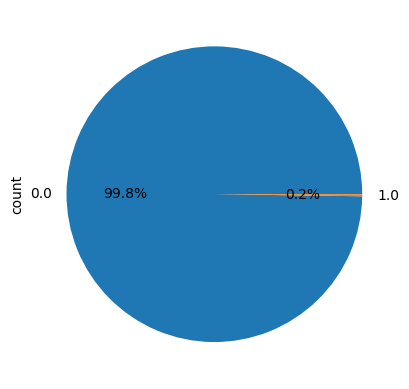

In [37]:
#Visualising fraud and non fraud
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%')

In [38]:
#Splitting the data into fraud and non fraud
non_fraud = df[df['isFraud']==0]
fraud = df[df['isFraud']==1]

In [39]:
#Dropping irrelevant columns
df = df.drop(['isFlaggedFraud', 'Sender', 'Reciever'], axis = 1)

In [40]:
df.columns

Index(['Transaction_Hours', 'Type', 'Transaction_Amt', 'Sender_Bal_B4',
       'Sender_Bal_After', 'Reciever_Bal_B4', 'Reciever_Bal_After', 'isFraud'],
      dtype='object')

In [41]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

In [42]:
#Now dividing the dataframe into dependent and independent variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [44]:
#Check the shape
X.shape, y.shape

((42270, 7), (42270,))

In [45]:
#Dividing the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33816, 7), (8454, 7), (33816,), (8454,))

In [46]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [48]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [50]:
print("Before OverSampling, count of label '1' is: {} ".format(sum(y_train==1)))
print("Before OverSampling, count of label '0' is: {} ".format(sum(y_train==0)))

Before OverSampling, count of label '1' is: 70 
Before OverSampling, count of label '0' is: 33746 


In [61]:
# Checking X_train & Y_train shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(33816, 7)
(33816,)
(8454, 1, 7)


In [62]:
# Reshaping X_train since it is 3D
if len(X_train.shape) == 3:
    n_samples, n_timesteps, n_features = X_train.shape
    X_train = X_train.reshape((n_samples, n_timesteps * n_features))

# Reshaping X_testing since it is 3D
if len(X_test.shape) == 3:
    n_samples_test, n_timesteps_test, n_features_test = X_test.shape
    X_test = X_test.reshape((n_samples_test, n_timesteps_test * n_features_test))

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train.ravel())

X_res = X_res.reshape(X_res.shape[0], X_res.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [64]:
print("After OverSampling, the shape of X_train' is: {} ".format(X_res.shape))
print("After OverSampling, the shape of y_train' is: {} ".format(y_res.shape))

print("After OverSampling, count of label '1' is: {} ".format(sum(y_res==1)))
print("After OverSampling, count of label '0' is: {} ".format(sum(y_res==0)))

After OverSampling, the shape of X_train' is: (67492, 7, 1) 
After OverSampling, the shape of y_train' is: (67492,) 
After OverSampling, count of label '1' is: 33746 
After OverSampling, count of label '0' is: 33746 


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization, Dropout

In [69]:
#Import model
model = Sequential()

#layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_res[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Building ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 32)             96        
                                                                 
 batch_normalization (Batch  (None, 6, 32)             128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 64)             4160      
                                                                 
 batch_normalization_1 (Bat  (None, 5, 64)             256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)            

In [71]:
#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
#Fitting the model
%%time
history1 = model.fit(X_res, y_res, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2110/2110 [==============================] - 13s 6ms/step - loss: 1.1661 - accuracy: 0.9153 - val_loss: 0.9093 - val_accuracy: 0.9300
Epoch 2/10
2110/2110 [==============================] - 11s 5ms/step - loss: 1.1438 - accuracy: 0.9172 - val_loss: 0.4357 - val_accuracy: 0.9690
Epoch 3/10
2110/2110 [==============================] - 10s 5ms/step - loss: 1.0493 - accuracy: 0.9258 - val_loss: 0.3172 - val_accuracy: 0.9786
Epoch 4/10
2110/2110 [==============================] - 11s 5ms/step - loss: 0.9342 - accuracy: 0.9350 - val_loss: 1.0033 - val_accuracy: 0.9303
Epoch 5/10
2110/2110 [==============================] - 11s 5ms/step - loss: 0.8974 - accuracy: 0.9379 - val_loss: 0.5209 - val_accuracy: 0.9637
Epoch 6/10
2110/2110 [==============================] - 11s 5ms/step - loss: 0.9176 - accuracy: 0.9367 - val_loss: 0.5484 - val_accuracy: 0.9614
Epoch 7/10
2110/2110 [==============================] - 11s 5ms/step - loss: 0.7965 - accuracy: 0.9447 - val_loss: 0.8218 - val_ac

In [75]:
import os

# Define the directory path
directory = '/content/drive/MyDrive/BFloat - PoC/'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)


In [76]:
# Serialize to JSON
model_json = model.to_json()
with open(os.path.join(directory, "model.json"), "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights(os.path.join(directory, "model.h5"))
print("Model Saved to disk!")

Model Saved to disk!


#**BFloat 16**

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization, Dropout

In [78]:
#Import model
model2 = Sequential()

#layers
model2.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_res[0].shape))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

#Building ANN
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='relu'))

In [81]:
policy = tf.keras.mixed_precision.Policy('mixed_bfloat16')
tf.keras.mixed_precision.set_global_policy(policy)

In [82]:
#Convert input data to bfloat data type
X_train_bfloat = tf.convert_to_tensor(X_res, dtype = tf.bfloat16)

In [83]:
X_train_bfloat.shape

TensorShape([67492, 7, 1])

In [84]:
X_test_bfloat = tf.convert_to_tensor(X_test, dtype = tf.bfloat16)

In [85]:
#Compiling the second model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
#Fitting the model
%%time
history2 = model.fit(X_res, y_res, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2110/2110 [==============================] - 15s 7ms/step - loss: 1.1504 - accuracy: 0.9216 - val_loss: 0.5992 - val_accuracy: 0.9591
Epoch 2/10
2110/2110 [==============================] - 12s 6ms/step - loss: 0.9365 - accuracy: 0.9368 - val_loss: 2.4069 - val_accuracy: 0.8364
Epoch 3/10
2110/2110 [==============================] - 11s 5ms/step - loss: 0.9568 - accuracy: 0.9353 - val_loss: 0.5895 - val_accuracy: 0.9599
Epoch 4/10
2110/2110 [==============================] - 12s 6ms/step - loss: 0.7629 - accuracy: 0.9485 - val_loss: 0.2904 - val_accuracy: 0.9802
Epoch 5/10
2110/2110 [==============================] - 12s 6ms/step - loss: 0.8289 - accuracy: 0.9440 - val_loss: 1.3956 - val_accuracy: 0.9067
Epoch 6/10
2110/2110 [==============================] - 10s 5ms/step - loss: 0.8534 - accuracy: 0.9419 - val_loss: 0.4750 - val_accuracy: 0.9677
Epoch 7/10
2110/2110 [==============================] - 11s 5ms/step - loss: 0.8018 - accuracy: 0.9457 - val_loss: 0.5528 - val_ac

In [87]:
# Serialize to JSON
model_json2 = model2.to_json()
with open(os.path.join(directory, "model.json"), "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights(os.path.join(directory, "model.h5"))
print("Model Saved to disk!")

Model Saved to disk!
